In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
def download_confirmedUS():
    """
    Downloads time_series_covid19_confirmed_US.csv from the Johns Hopkins repo
    """
    dfConfirmedUS = pd.read_csv(r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    return dfConfirmedUS

In [3]:
def get_timeseries(dfConfirmedUS, fips_code):
    """
    dfConfirmed is a dataframe containing data from the time_series_covid19_confirmed_US.csv file downloaded from 
    the Johns Hopkins repo
    
    fips_code is the number in the FIPS field which specifies an area (Guam: 66)
    
    Returns a dataframe containing a time series of cumulative confirmed cases for the area specified by fips_code.
    """
    df = dfConfirmedUS[dfConfirmedUS.FIPS==fips_code]
    assert(df.shape[0]==1)
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 
                  'Long_', 'Combined_Key'], axis=1)
    df = df.transpose()
    df.columns = ['cases']
    df = df[df.cases>0]
    
    # Converting index from string to date
    df.index = pd.to_datetime(df.index)
    
    return df

# Get timeseries for Gum (fips_code 66)
#get_timeseries(dfConfirmedUS, 66)

In [4]:
def plot_data(df, place_name):
    """
    Plots data in this notebook and also writes the plot to a PNG file.
    """
    plot = df.plot(style='o', title='Confirmed CORVID19 cases in {}'.format(place_name))    
    fig = plot.get_figure()
    fig.savefig('images/{}.png'.format(place_name), bbox_inches='tight')

# Main

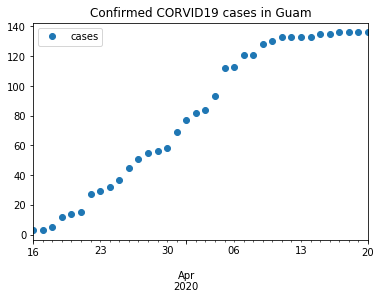

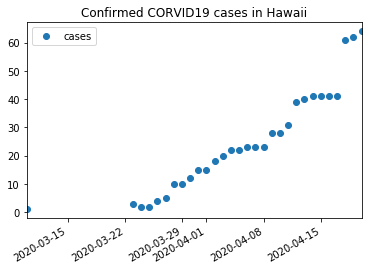

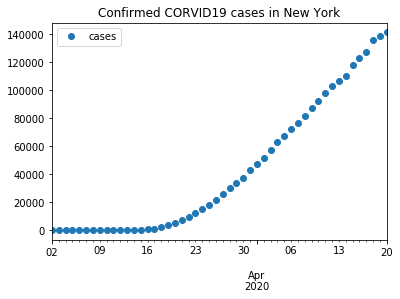

In [5]:
raw_data_file = 'ConfirmedUSStates2.csv'
fips_code = {'Guam': 66, 'Hawaii': 15001, 'New York': 36061}
place_names = ['Guam', 'Hawaii', 'New York']

dfConfirmedUS = download_confirmedUS()
dfConfirmedUS.to_csv(raw_data_file, index=False)

for place_name in place_names:
    df = get_timeseries(dfConfirmedUS, fips_code[place_name])
    df.to_csv('{}.csv'.format(place_name))
    plot_data(df, place_name)